In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

/Users/rafael1/opt/anaconda3/envs/qiskit-029/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [2]:
import numpy as np
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import RYGate
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator

In [3]:
def i_gate(qc,q,n):
    theta=2*np.arccos(np.sqrt(1/n))
    qc.cx(q[n-2],q[n-1])
    qc.cu(theta,0,0,0,q[n-1],q[n-2])
    qc.cx(q[n-2],q[n-1])    
    
def ii_gate(qc,q,n,l):
    theta=2*np.arccos(np.sqrt(l/n))
    ccry=RYGate(theta).control(2)
    qc.cx(q[n-l-1],q[n-1])
    qc.append(ccry,[q[n-l],q[n-1],q[n-l-1]])
    qc.cx(q[n-l-1],q[n-1])    
    
def SCS(qc,q,n,k):
    i_gate(qc,q,n)
    for l in range(2,k+1):
        ii_gate(qc,q,n,l)
    
def U(qc,q,n,k):
    for l in reversed(range(k+1,n+1)):
        SCS(qc,q,l,k)
    
    for l in reversed(range(2,k+1)):
        SCS(qc,q,l,l-1)
        
def Dicke(qc,q,n,k):
    for l in range(n-k,n):
        qc.x(q[l])
    U(qc,q,n,k)   


## L=5, M=3

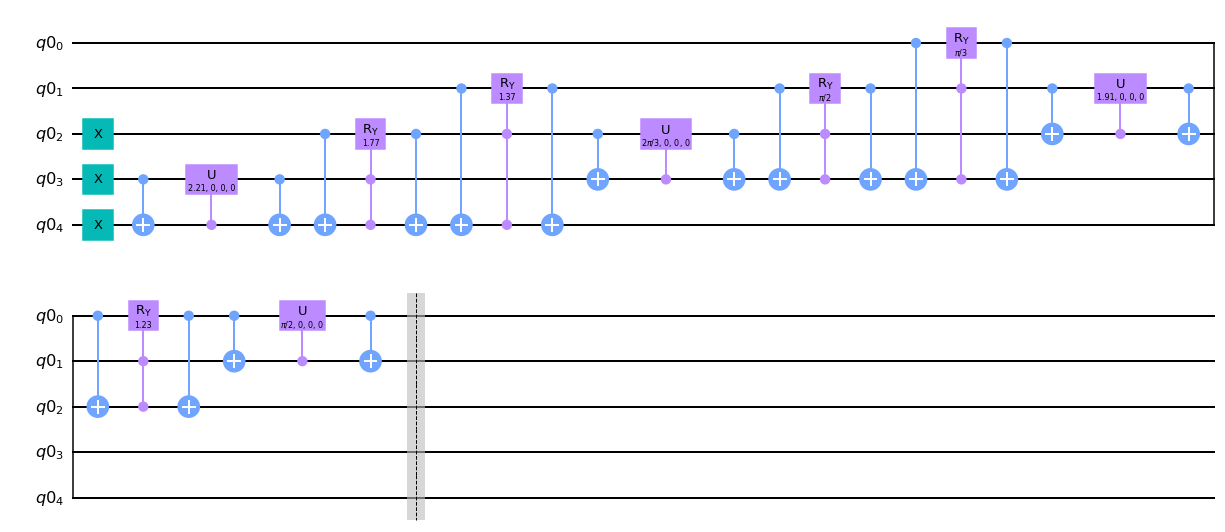

In [4]:
L=5
M=3
q=QuantumRegister(L)   # system qubits
qc=QuantumCircuit(q)

#Create Dicke state

Dicke(qc,q,L,M)

qc.barrier()

       
qc.draw(output="mpl")  

In [6]:
np.set_printoptions(suppress=True)

In [7]:
sv=Statevector.from_label('0'*L)
new_sv=sv.evolve(qc)
(new_sv.data)

array([ 0.        +0.j, -0.        +0.j, -0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.31622777+0.j,
       -0.        +0.j,  0.        +0.j,  0.        +0.j,  0.31622777+0.j,
        0.        +0.j,  0.31622777+0.j,  0.31622777+0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.31622777+0.j,
        0.        +0.j,  0.31622777+0.j,  0.31622777+0.j,  0.        +0.j,
        0.        +0.j,  0.31622777+0.j,  0.31622777+0.j,  0.        +0.j,
        0.31622777+0.j,  0.        +0.j,  0.        +0.j, -0.        +0.j])